In [1]:
import ROOT

Welcome to JupyROOT 6.18/04


In [2]:
FileMBGen  = ROOT.TFile("Input/MinBiasMC_Gen_Sample.root")
FileMBReco = ROOT.TFile("Input/MinBiasMC_Reco_Sample.root")
FileDYGen  = ROOT.TFile("Input/DYLLMC_Gen_Sample.root")
FileDYReco = ROOT.TFile("Input/DYLLMC_Reco_Sample.root")
FilePPGen  = ROOT.TFile("Input/PPMC_Gen_Sample.root")
FilePPReco = ROOT.TFile("Input/PPMC_Reco_Sample.root")

# FileMBGen  = ROOT.TFile("Input/MinBiasMC_Gen.root")
# FileMBReco = ROOT.TFile("Input/MinBiasMC_Reco.root")
# FileDYGen  = ROOT.TFile("Input/DYLLMC_Gen.root")
# FileDYReco = ROOT.TFile("Input/DYLLMC_Reco.root")
# FilePPGen  = ROOT.TFile("Input/PPMC_Gen.root")
# FilePPReco = ROOT.TFile("Input/PPMC_Reco.root")

def CleanUp():
    FileMBGen.Close()
    FileMBReco.Close()
    FileDYGen.Close()
    FileDYReco.Close()
    FilePPGen.Close()
    FilePPReco.Close()

TreeMBGen  = FileMBGen.Get("Tree")
TreeMBReco = FileMBReco.Get("Tree")
TreeDYGen  = FileDYGen.Get("Tree")
TreeDYReco = FileDYReco.Get("Tree")
TreePPGen  = FilePPGen.Get("Tree")
TreePPReco = FilePPReco.Get("Tree")

Error in <TList::Clear>: A list is accessing an object (0x56441d808080) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441d86f9b0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441be85330) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441be856a0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441be85a10) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441be85f40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441be86170) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441bea7e90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x56441bea8330) already deleted (list name = TList)
Error in <TList::Clear>: A l

In [3]:
TreeDYGen.SetAlias("GoodGenZ", "(genZPt[0] > 20 && genZY[0] < 2.4 && genZY[0] > -2.4 && genZMass[0] > 60 && genZMass[0] < 120)");
TreeDYReco.SetAlias("GoodRecoZ", "(zPt[0] > 20 && zY[0] < 2.4 && zY[0] > -2.4 && zMass[0] > 60 && zMass[0] < 120)");
TreePPGen.SetAlias("GoodGenZ", "(genZPt[0] > 20 && genZY[0] < 2.4 && genZY[0] > -2.4 && genZMass[0] > 60 && genZMass[0] < 120)");
TreePPReco.SetAlias("GoodRecoZ", "(zPt[0] > 20 && zY[0] < 2.4 && zY[0] > -2.4 && zMass[0] > 60 && zMass[0] < 120)");

In [4]:
PMBGen   = ROOT.TProfile("PMBGen",  "", 100, 0, 200)
PMBReco  = ROOT.TProfile("PMBReco", "", 100, 0, 200)
HMBRatio = ROOT.TH1D("HMBRatio", "", 100, 0, 200)
PDYGen   = ROOT.TProfile("PDYGen",  "", 100, 0, 200)
PDYReco  = ROOT.TProfile("PDYReco", "", 100, 0, 200)
HDYRatio = ROOT.TH1D("HDYRatio", "", 100, 0, 200)
PPPGen  = ROOT.TProfile("PPPGen",  "", 1, 0, 200)
PPPReco = ROOT.TProfile("PPPReco", "", 1, 0, 200)

Canvas1 = ROOT.TCanvas("Canvas1", "Canvas")
Canvas2 = ROOT.TCanvas("Canvas2", "Canvas")
Canvas = ROOT.TCanvas("Canvas", "Canvas")

In [5]:
PMBGen.SetLineColor(ROOT.kRed)
PMBReco.SetLineColor(ROOT.kBlue)
PDYGen.SetLineColor(ROOT.kRed)
PDYReco.SetLineColor(ROOT.kBlue)
PPPGen.SetLineColor(ROOT.kRed)
PPPReco.SetLineColor(ROOT.kBlue)

In [6]:
def DrawMBRatio():
    Canvas1.cd()

    TreeMBGen.Draw("Sum$(trackPt>2):hiBin>>PMBGen", "", "prof", 100000)
    TreeMBReco.Draw("Sum$((trackPt>2)*trackWeight):hiBin>>PMBReco", "", "prof same", 100000)

    Canvas1.SetLogy()
    Canvas1.Draw()

    Canvas2.cd()

    for i in range(1, 201):
        if PMBGen.GetBinContent(i) != 0:
            HMBRatio.SetBinContent(i, PMBReco.GetBinContent(i) / PMBGen.GetBinContent(i))
    HMBRatio.Draw()

    Canvas2.Draw()

# DrawMBRatio()


In [7]:
def DrawDYRatio():
    Canvas1.cd()

    TreeDYGen.Draw("Sum$(trackPt>2):hiBin>>PDYGen", "GoodGenZ", "prof", 100000)
    TreeDYReco.Draw("Sum$((trackPt>2)*trackWeight):hiBin>>PDYReco", "GoodRecoZ", "prof same", 100000)

    Canvas1.SetLogy()
    Canvas1.Draw()

    Canvas2.cd()

    for i in range(1, 201):
        if PDYGen.GetBinContent(i) != 0:
            HDYRatio.SetBinContent(i, PDYReco.GetBinContent(i) / PDYGen.GetBinContent(i))
    HDYRatio.Draw()

    Canvas2.Draw()

# DrawDYRatio()


In [8]:
def DrawPPRatio():
    Canvas1.cd()
    TreePPGen.Draw("Sum$(trackPt>2):hiBin*0+1>>PPPGen", "GoodGenZ", "prof", 100000)
    TreePPReco.Draw("Sum$((trackPt>2)*trackWeight):hiBin*0+1>>PPPReco", "zMass[0] > 60 && zMass[0] < 120 && zY[0] < 2.4 && zY[0] > -2.4 && zPt[0] > 20", "prof same", 100000)
    Canvas1.SetLogy()
    Canvas1.Draw()

    Canvas2.cd()
    HPPRatio = ROOT.TH1D("HPPRatio", "", 100, 0, 200)
    for i in range(1, 201):
        if PPPGen.GetBinContent(1) != 0:
            HPPRatio.SetBinContent(i, PPPReco.GetBinContent(1) / PPPGen.GetBinContent(1))
    HPPRatio.Draw()
    Canvas2.Draw()

# DrawPPRatio()


In [9]:
def DrawRatioComparison():
    Canvas.cd()

    HMBRatio.SetLineColor(ROOT.kRed)
    HDYRatio.SetLineColor(ROOT.kBlue)
    HPPRatio.SetLineColor(ROOT.kGreen)

    HMBRatio.SetStats(0)
    HDYRatio.SetStats(0)
    HPPRatio.SetStats(0)

    HMBRatio.Draw()
    HDYRatio.Draw("same")
    HPPRatio.Draw("same")

    Legend = ROOT.TLegend(0.2, 0.8, 0.5, 0.65)
    Legend.SetTextFont(42)
    Legend.SetTextSize(0.035)
    Legend.SetFillStyle(0)
    Legend.SetBorderSize(0)
    Legend.AddEntry(HMBRatio, "MB", "l")
    Legend.AddEntry(HDYRatio, "DY", "l")
    Legend.AddEntry(HPPRatio, "PP", "l")
    Legend.Draw()

    Canvas.Draw()

# DrawRatioComparison()

In [10]:
def DivideByBinWidth(H):
    N = H.GetNbinsX()
    for i in range(1, N + 1):
        L = H.GetXaxis().GetBinLowEdge(i)
        R = H.GetXaxis().GetBinUpEdge(i)
        H.SetBinContent(i, H.GetBinContent(i) / (R - L))
        H.SetBinError(i, H.GetBinError(i) / (R - L))

In [11]:
HMBGenPT   = ROOT.TH1D("HMBGenPT", ";;", 100, 0, 100)
HDYGenPT   = ROOT.TH1D("HDYGenPT", ";;", 100, 0, 100)
HDYS0GenPT = ROOT.TH1D("HDYS0GenPT", ";;", 100, 0, 100)
HDYS1GenPT = ROOT.TH1D("HDYS1GenPT", ";;", 100, 0, 100)
HMBRecoPT  = ROOT.TH1D("HMBRecoPT", ";;", 100, 0, 100)
HDYRecoPT  = ROOT.TH1D("HDYRecoPT", ";;", 100, 0, 100)
HDYRecoWPT = ROOT.TH1D("HDYRecoWPT", ";;", 100, 0, 100)
HPPGenPT   = ROOT.TH1D("HPPGenPT", ";;", 100, 0, 100)
HPPRecoPT  = ROOT.TH1D("HPPRecoPT", ";;", 100, 0, 100)

HZCount    = ROOT.TH1D("HZCount", ";;", 10, 1, 11)

In [12]:
HMBGenPT.SetLineColor(ROOT.kRed)
HDYGenPT.SetLineColor(ROOT.kOrange + 3)
HDYS0GenPT.SetLineColor(ROOT.kBlue)
HMBRecoPT.SetLineColor(ROOT.kGreen + 3)
HDYRecoPT.SetLineColor(ROOT.kBlue)
HDYRecoWPT.SetLineColor(ROOT.kCyan)

HMBGenPT.SetLineWidth(2)
HDYGenPT.SetLineWidth(2)
HDYS0GenPT.SetLineWidth(2)
HDYS1GenPT.SetLineWidth(2)
HMBRecoPT.SetLineWidth(2)
HDYRecoPT.SetLineWidth(2)
HDYRecoWPT.SetLineWidth(2)


In [13]:
MinPT = 3

In [14]:
TreeMBGen.Draw("trackPt >> HMBGenPT", f"EventWeight * (trackPt >= {MinPT})", "")
TreeMBGen.Draw("1 >> HZCount", "EventWeight * (Sum$(trackPt) > 0)", "")
HMBGenPT.Scale(1 / HZCount.GetBinContent(1))
print(HZCount.GetBinContent(1))

98341.0


In [15]:
TreeDYGen.Draw("trackPt >> HDYGenPT", f"EventWeight * (GoodGenZ && (trackMuTagged == 0) && (trackPt >= {MinPT}))", "")
TreeDYGen.Draw("trackPt >> HDYS0GenPT", f"EventWeight * (GoodGenZ && (trackMuTagged == 0) && (trackPt >= {MinPT}) && (subevent == 0))", "")
TreeDYGen.Draw("trackPt >> HDYS1GenPT", f"EventWeight * (GoodGenZ && (trackMuTagged == 0) && (trackPt >= {MinPT}) && (subevent == 1))", "")
TreeDYGen.Draw("2 >> HZCount", "EventWeight * GoodGenZ", "")
HDYGenPT.Scale(1 / HZCount.GetBinContent(2))
HDYS0GenPT.Scale(1 / HZCount.GetBinContent(2))
HDYS1GenPT.Scale(1 / HZCount.GetBinContent(2))
print(HZCount.GetBinContent(2))

13412485.279785156


In [16]:
TreeMBReco.AddFriend(TreeDYReco, "TDY")
TreeMBReco.Draw("trackPt >> HMBRecoPT", f"EventWeight * ((trackPt >= {MinPT}) * (trackWeight))", "")
TreeMBReco.Draw("3 >> HZCount", "EventWeight * (Sum$(trackPt) > 0)", "")
HMBRecoPT.Scale(1 / HZCount.GetBinContent(3))
print(HZCount.GetBinContent(3))

97603.0


In [17]:
TreeDYReco.Draw("trackPt >> HDYRecoPT", f"EventWeight * (GoodRecoZ * (trackPt >= {MinPT} && trackMuTagged == 0) * (trackWeight))", "")
TreeDYReco.Draw("4 >> HZCount", "EventWeight * GoodRecoZ", "")
HDYRecoPT.Scale(1 / HZCount.GetBinContent(4))
print(HZCount.GetBinContent(4))

20336620.25341797


In [18]:
TreeDYReco.Draw("trackPt >> HDYRecoWPT", f"EventWeight * ZWeight * (GoodRecoZ * (trackPt >= {MinPT} && trackMuTagged == 0) * (trackWeight))", "")
TreeDYReco.Draw("5 >> HZCount", "EventWeight * GoodRecoZ * ZWeight", "")
HDYRecoWPT.Scale(1 / HZCount.GetBinContent(5))
print(HZCount.GetBinContent(5))

22100759.668332633


In [19]:
TreePPGen.Draw("trackPt >> HPPGenPT", f"EventWeight * (trackPt >= {MinPT} && GoodGenZ && trackMuTagged == 0)")
TreePPGen.Draw("6 >> HZCount", "EventWeight * GoodGenZ", "")
HPPGenPT.Scale(1 / HZCount.GetBinContent(6))
print(HZCount.GetBinContent(6))

12530097.189941406


In [20]:
TreePPReco.Draw("trackPt >> HPPRecoPT", f"EventWeight * ZWeight * (trackPt >= {MinPT} && GoodRecoZ && trackMuTagged == 0) * trackWeight")
TreePPReco.Draw("7 >> HZCount", "EventWeight * GoodRecoZ * ZWeight", "")
HPPRecoPT.Scale(1 / HZCount.GetBinContent(7))
print(HZCount.GetBinContent(7))

20980579.24060728


MB Gen =  14.014927649708664
DY Subevent 1 =  14.156712570677055
MB Reco =  14.706037543194277


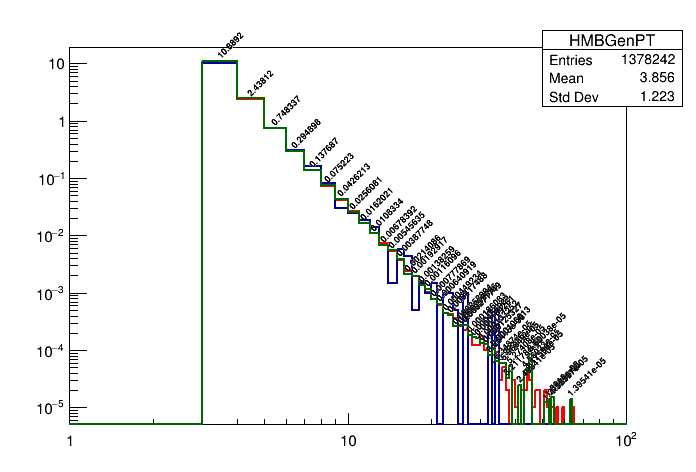

In [21]:
HMBGenPT.Draw("hist")
HDYS1GenPT.Draw("hist same")
HMBRecoPT.Draw("hist text45 same")

Canvas.SetLogx(True)
Canvas.SetLogy(True)
Canvas.Draw()

print("MB Gen = ", HMBGenPT.Integral())
print("DY Subevent 1 = ", HDYS1GenPT.Integral())
print("MB Reco = ", HMBRecoPT.Integral())

DY Gen =  17.03076747854098
DY Reco =  16.869139942037634
DY Reco with Z weight =  17.951730371567795


2.9464050171930354

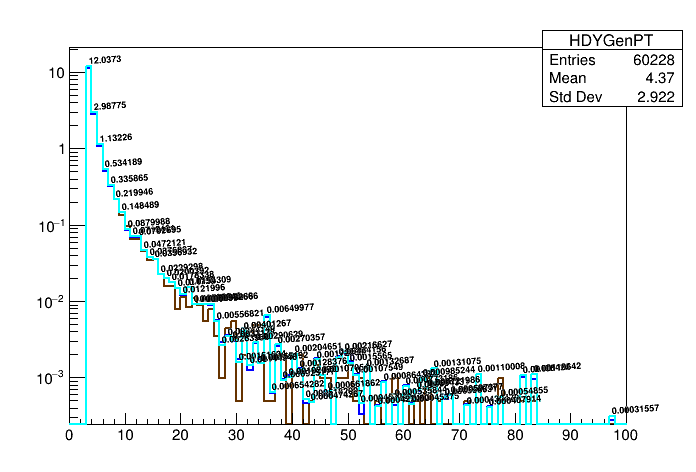

In [22]:
HDYGenPT.Draw("hist")
HDYRecoPT.Draw("hist same")
HDYRecoWPT.Draw("hist text4 same")

HDYGenPT.SetMinimum()

Canvas.SetLogx(False)
Canvas.SetLogy(True)
Canvas.Draw()

print("DY Gen = ", HDYGenPT.Integral())
print("DY Reco = ", HDYRecoPT.Integral())
print("DY Reco with Z weight = ", HDYRecoWPT.Integral())

HDYGenPT.GetBinContent(4)
HDYGenPT.GetBinContent(5)

Gen diff =  3.0158398288323407
Gen diff (self) =  2.8740549078639543
Reco diff =  3.2456928283735302
Gen subevent0 =  2.8740549078639535
Gen pp =  2.866631523458088
Reco pp =  2.9620809768818206


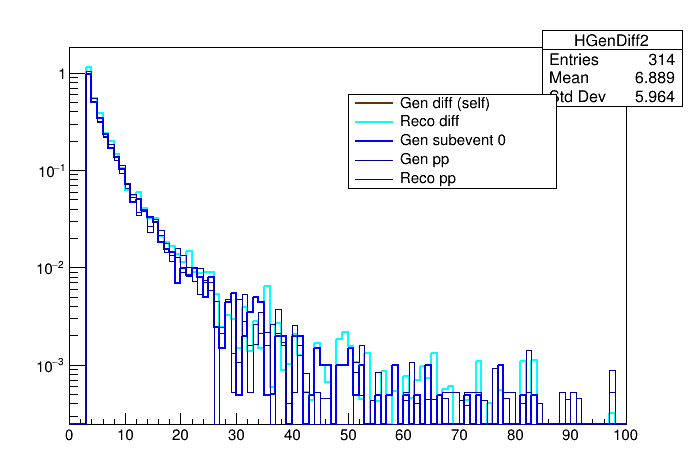

In [23]:
HGenDiff = HDYGenPT.Clone("HGenDiff")
HGenDiff.Add(HMBGenPT, -1)
HGenDiff2 = HDYGenPT.Clone("HGenDiff2")
HGenDiff2.Add(HDYS1GenPT, -1)
HRecoDiff = HDYRecoWPT.Clone("HRecoDiff")
HRecoDiff.Add(HMBRecoPT, -1)

# HGenDiff.Draw("hist")
HGenDiff2.Draw("hist")
HRecoDiff.Draw("hist same")
HDYS0GenPT.Draw("hist same")
HPPGenPT.Draw("hist same")
HPPRecoPT.Draw("hist same")

Legend = ROOT.TLegend(0.5, 0.8, 0.8, 0.6)
# Legend.AddEntry(HGenDiff, "Gen diff", "l")
Legend.AddEntry(HGenDiff2, "Gen diff (self)", "l")
Legend.AddEntry(HRecoDiff, "Reco diff", "l")
Legend.AddEntry(HDYS0GenPT, "Gen subevent 0", "l")
Legend.AddEntry(HPPGenPT, "Gen pp", "l")
Legend.AddEntry(HPPRecoPT, "Reco pp", "l")
Legend.Draw()

Canvas.SetLogx(False)
Canvas.Draw()

print("Gen diff = ", HGenDiff.Integral())
print("Gen diff (self) = ", HGenDiff2.Integral())
print("Reco diff = ", HRecoDiff.Integral())
print("Gen subevent0 = ", HDYS0GenPT.Integral())
print("Gen pp = ", HPPGenPT.Integral())
print("Reco pp = ", HPPRecoPT.Integral())

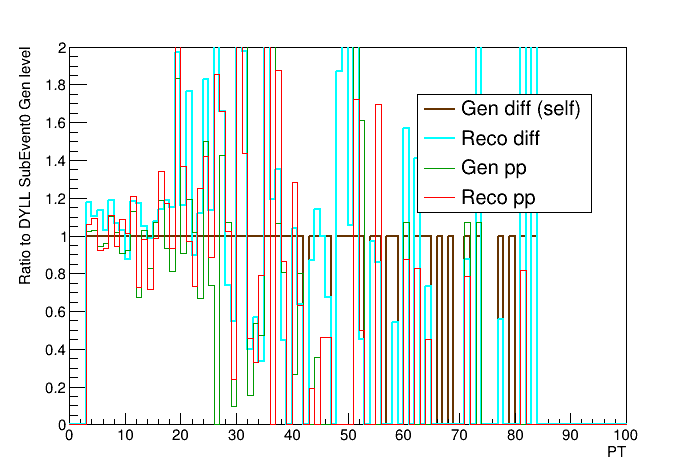

In [24]:
HGenDiff2Ratio = HGenDiff2.Clone("HGenDiff2Ratio")
HRecoDiffRatio = HRecoDiff.Clone("HRecoDiffRatio")
HPPGenPTRatio  = HPPGenPT.Clone("HPPGenPTRatio")
HPPRecoPTRatio = HPPRecoPT.Clone("HPPRecoPTRatio")

HPPGenPTRatio.SetLineColor(ROOT.kGreen + 2)
HPPRecoPTRatio.SetLineColor(ROOT.kRed)

HGenDiff2Ratio.Divide(HDYS0GenPT)
HRecoDiffRatio.Divide(HDYS0GenPT)
HPPGenPTRatio.Divide(HDYS0GenPT)
HPPRecoPTRatio.Divide(HDYS0GenPT)

HGenDiff2Ratio.SetMaximum(2)
HGenDiff2Ratio.SetMinimum(0)
HGenDiff2Ratio.GetXaxis().SetTitle("PT")
HGenDiff2Ratio.GetYaxis().SetTitle("Ratio to DYLL SubEvent0 Gen level")

HGenDiff2Ratio.SetStats(0)

# HGenDiff.Draw("hist")
HGenDiff2Ratio.Draw("hist")
HRecoDiffRatio.Draw("hist same")
HPPGenPTRatio.Draw("hist same")
HPPRecoPTRatio.Draw("hist same")

Legend = ROOT.TLegend(0.6, 0.8, 0.85, 0.55)
# Legend.AddEntry(HGenDiff, "Gen diff", "l")
Legend.AddEntry(HGenDiff2Ratio, "Gen diff (self)", "l")
Legend.AddEntry(HRecoDiffRatio, "Reco diff", "l")
Legend.AddEntry(HPPGenPTRatio, "Gen pp", "l")
Legend.AddEntry(HPPRecoPTRatio, "Reco pp", "l")
Legend.Draw()

Canvas.SetLogx(False)
Canvas.SetLogy(False)
Canvas.Draw()

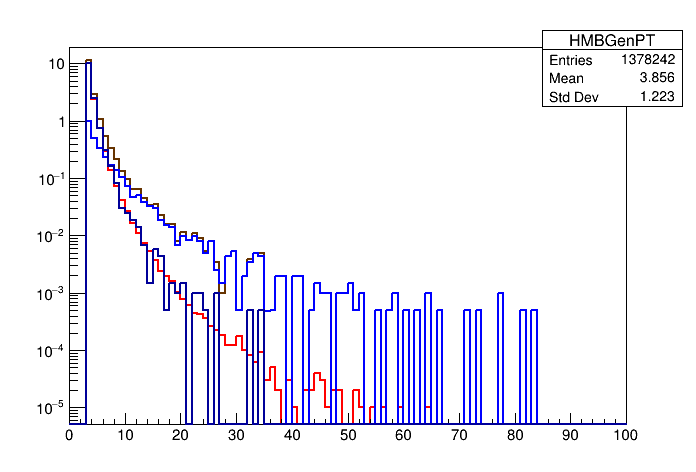

In [25]:
HMBGenPT.Draw("hist")
HDYGenPT.Draw("hist same")
HDYS0GenPT.Draw("hist same")
HDYS1GenPT.Draw("hist same")

Canvas.SetLogy()
Canvas.Draw()

In [26]:
print(HMBGenPT.Integral())
print(HDYGenPT.Integral())
print(HDYS0GenPT.Integral())
print(HDYS1GenPT.Integral())
print(HDYGenPT.Integral() - HMBGenPT.Integral())

14.014927649708664
17.03076747854098
2.8740549078639535
14.156712570677055
3.0158398288323163


In [27]:
print(HMBRecoPT.Integral())
print(HDYRecoWPT.Integral())
print(HDYRecoWPT.Integral() - HMBRecoPT.Integral())

14.706037543194277
17.951730371567795
3.2456928283735174


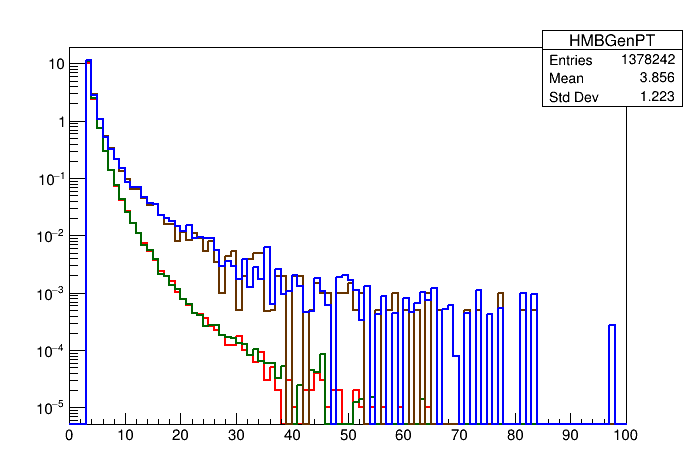

In [28]:
HMBGenPT.Draw("hist")
HMBRecoPT.Draw("hist same")
HDYGenPT.Draw("hist same")
HDYRecoPT.Draw("hist same")

Canvas.Draw()

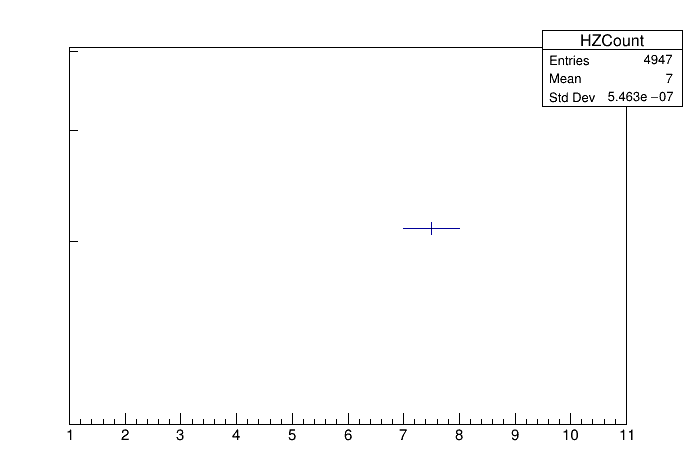

In [29]:
HZCount.Draw()
Canvas.Draw()

In [30]:
TreeDYReco.Scan("EventWeight:GoodRecoZ:ZWeight", "GoodRecoZ", "", 1000)

53

************************************************
*    Row   * EventWeig * GoodRecoZ *   ZWeight *
************************************************
*       25 * 6605.8007 *         1 * 1.0351340 *
*       51 * 6605.8007 *         1 * 1.0324872 *
*       55 * 6605.8007 *         1 * 1.0259267 *
*       60 * -6539.742 *         1 *  1.166394 *
*       85 * 6605.8007 *         1 * 1.1257233 *
*      111 * -6605.800 *         1 * 1.0522024 *
*      135 * 6605.8007 *         1 * 1.1752004 *
*      148 * 6605.8007 *         1 * 1.0255265 *
*      191 * 6605.8007 *         1 * 1.0568157 *
*      193 * 6605.8007 *         1 * 1.0549453 *
*      238 * 6605.8007 *         1 *  1.057091 *
*      250 * -6605.800 *         1 * 1.0476629 *
*      282 * 6605.8007 *         1 * 1.0323004 *
*      320 * 6605.8007 *         1 * 1.0560032 *
*      346 * 6605.8007 *         1 * 1.0500932 *
*      360 * -6539.742 *         1 * 1.0555133 *
*      375 * 6605.8007 *         1 * 1.0583242 *
*      398 * 6605.80

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> 

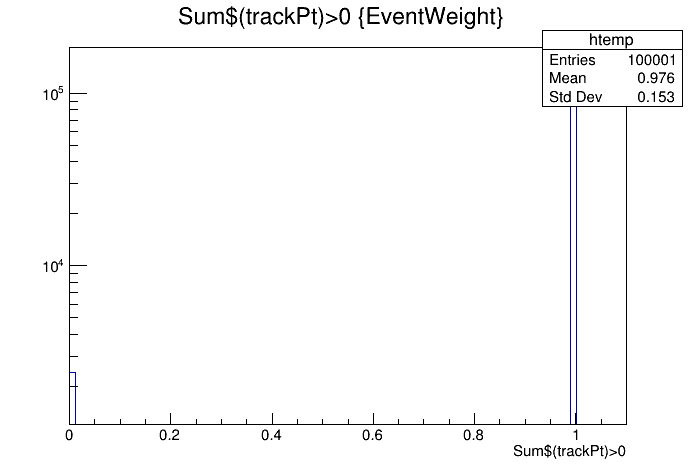

In [31]:
TreeMBReco.Draw("Sum$(trackPt)>0", "EventWeight", "")
Canvas.Draw()

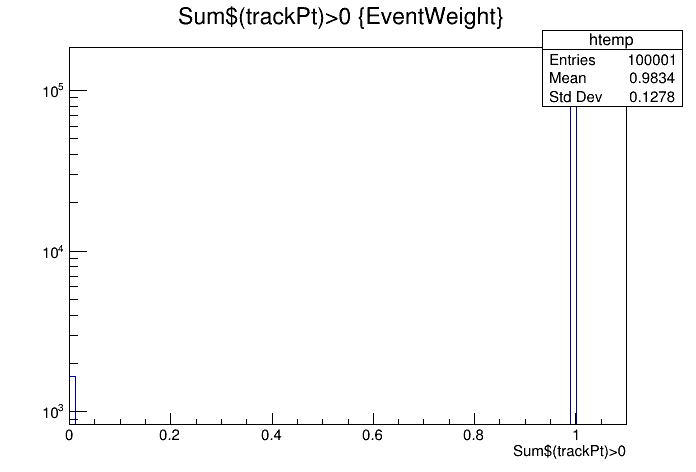

In [32]:
TreeMBGen.Draw("Sum$(trackPt)>0", "EventWeight", "")
Canvas.Draw()

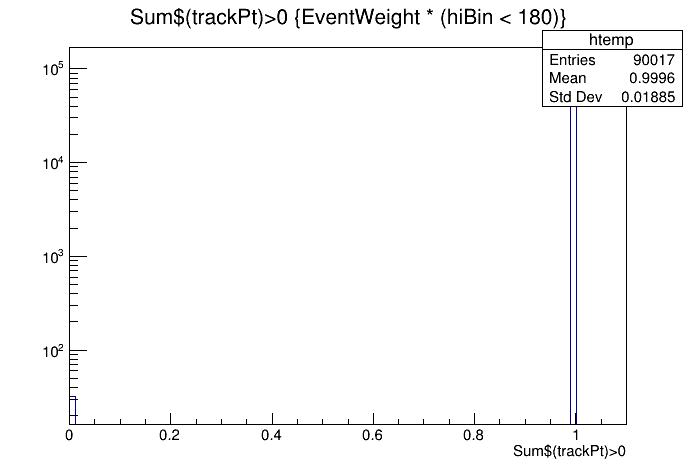

In [33]:
TreeMBReco.Draw("Sum$(trackPt)>0", "EventWeight * (hiBin < 180)", "")
Canvas.Draw()